# Boxing Simulation

## Patrick Maloney
### DATA604 Final Project

## Introduction

Boxing is one of the world's oldest professional sports, but it has been one of the slowest to be inovated by analytics and data science applications that now proliferate other professional sports. In this project, I will attempt to build a simulation of the biggest match in history, Floyd Mayweather Jr. vs. Manny Pacquiao.  The match was one of the biggest financial events in the history of sports, netting each fighter nine-figure paydays for an evening's work, grossing over \$600 million overall, and leading to a then-record of over \\$50 million dollars being wagered on the fights outcome.  I will attempt to use punch statistics from both fighters to simulate the fight with Python.


### Import libraries

In [1]:
import numpy
import pandas
import random
import matplotlib as plt
from modsim import *
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
# set the random number generator
np.random.seed(7)

### Build State objects for each fighter

I will be using the modsim library for its convenience in building simulations. I build a state object for each fighter, which will  store each of there metrics from the simulaiton.

In [2]:
mayweather = State(thrown = 0, landed = 0, kd = 0, ko = 0, score = 0)
pacquiao = State(thrown = 0, landed = 0, kd = 0, ko = 0, score = 0)

,values
thrown,0
landed,0
kd,0
ko,0
score,0


### Time-step function
Now we need to create a time-step function that will simulate an instance in a round, so that we can later loop over to simulate an entire round. In this step function, we will use punch statistics to determine the probabilities that a punch will be thrown during a given moment, and whether that punch will land. 

In [3]:
def step(system):
    """This function takes in a system argument 
    containing punch probabilities and increments
    the state objects for each fighter"""
    if flip(system.m_throw): #probability Mayweather throws a punch
        mayweather.thrown += 1 # increment Mayweather "thrown" stats
        print('may throw')
        if flip(system.m_land): #probability the thrown punch lands on Pacquiao
            mayweather.landed += 1 # increment Mayweather "landed" stats
            print('may land')

In [4]:
# We define a system of parameters that correspond with the probability that each fighter
# will throw and/or land a punch during any given second of a round. these are placeholder values to get started.
system = System(m_throw = 0.21, m_land = 0.48, p_throw = 0.28, p_land = 0.3 )

,values
m_throw,0.21
m_land,0.48
p_throw,0.28
p_land,0.30


In [5]:
step(system)

may throw


In [6]:
mayweather

,values
thrown,1
landed,0
kd,0
ko,0
score,0


We see the function works as intended for a single fighter. Now let's add the second fighter to the mix, since boxing takes two to tango.

In [7]:
def step(system):
    """This function takes in a system argument 
    containing punch probabilities and increments
    the state objects for each fighter"""
    #Mayweather
    if flip(system.m_throw): #probability Mayweather throws a punch
        mayweather.thrown += 1 # increment Mayweather "thrown" stats
        print('may throw')
        if flip(system.m_land): #probability the thrown punch lands on Pacquiao
            mayweather.landed += 1 # increment Mayweather "landed" stats
            print('may land')
    #Pacquiao
    if flip(system.p_throw): #probability Pacquiao throws a punch
        pacquiao.thrown += 1 # increment Pacquiao "thrown" stats
        print('pac throw')
        if flip(system.p_land): #probability the thrown punch lands on Mayweather
            pacquiao.landed += 1 # increment Pacquiao "landed" stats
            print('pac land')

In [8]:
step(system)

In [9]:
mayweather

,values
thrown,1
landed,0
kd,0
ko,0
score,0


In [10]:
pacquiao

,values
thrown,0
landed,0
kd,0
ko,0
score,0


It worked as intended after I ran the cell multiple times. The next thing I will need is a function that will initialize the state objects back to zero to make testing these functions easier.

In [11]:
def reset_stats(state):
    "Takes state object as argument and resets punch counts"
    state.thrown = 0
    state.landed = 0
    state.kd = 0
    state.score = 0
    state.ko = 0

reset_stats(mayweather)
mayweather

,values
thrown,0
landed,0
kd,0
ko,0
score,0


In [12]:
reset_stats(pacquiao)
pacquiao

,values
thrown,0
landed,0
kd,0
ko,0
score,0


### Simulating a round
Now lets run the time-step function in a loop 180 times to simulate a 3-minute round. At the end of the round, we will want to compare the fighters landed punches and award more points to the person who landed more punches. Boxing uses a scoring system that awards 10 points to the winner and 9 points to the loser (minus a point for a knockdown, but we'll deal with that later.)  I will also remove the print statements from the step function.

In [13]:
def step(system):
    """This function takes in a system argument 
    containing punch probabilities and increments
    the state objects for each fighter"""
    #Mayweather
    if flip(system.m_throw): #probability Mayweather throws a punch
        mayweather.thrown += 1 # increment Mayweather "thrown" stats
        if flip(system.m_land): #probability the thrown punch lands on Pacquiao
            mayweather.landed += 1 # increment Mayweather "landed" stats
  
    #Pacquiao
    if flip(system.p_throw): #probability Pacquiao throws a punch
        pacquiao.thrown += 1 # increment Pacquiao "thrown" stats
        if flip(system.p_land): #probability the thrown punch lands on Mayweather
            pacquiao.landed += 1 # increment Pacquiao "landed" stats

            
def sim_round(system):
    for i in range(180): # run step function for each second in 3 minute round
        step(system)
    if mayweather.landed > pacquiao.landed:
        mayweather.score += 10
        pacquiao.score += 9
    elif pacquiao.landed > mayweather.landed:
        mayweather.score += 9
        pacquiao.score += 10
    else:
        mayweather.score += 10
        pacquiao.score += 10
        

sim_round(system)
mayweather

,values
thrown,42
landed,17
kd,0
ko,0
score,10


In [14]:
pacquiao

,values
thrown,52
landed,15
kd,0
ko,0
score,9


The round_sim function appears to work as intended. However, for it to work in a loop to simulate an entire fight, we will need  the counts to reset at the beginning of each round after the points have been awarded, but still increment the totals for each fighter. To do this, I will create a new state object within the system object that will store the values for that round and increment the totals for each fighter. I will also include a new function to reset the values at the beginning of each round.

In [15]:
init = State(m_thrown = 0,
             m_landed = 0,
             m_kd = 0,
             p_thrown = 0,
             p_landed = 0,
             p_kd = 0)

system = System(init = init,
                m_throw = 0.21,
                m_land = 0.48,
                p_throw = 0.28,
                p_land = 0.30)

def reset_round_stats():
    system.init = State(m_thrown = 0,
             m_landed = 0,
             m_kd = 0,
             p_thrown = 0,
             p_landed = 0,
             p_kd = 0)

def step(system):
    """This function takes in a system argument 
    containing punch probabilities and increments
    the state objects for each fighter"""
    #Mayweather
    if flip(system.m_throw): #probability Mayweather throws a punch
        system.init.m_thrown += 1 # increment Mayweather round "thrown" stats
        if flip(system.m_land): #probability the thrown punch lands on Pacquiao
            system.init.m_landed += 1 # increment Mayweather "landed" stats for this round
  
    #Pacquiao
    if flip(system.p_throw): #probability Pacquiao throws a punch
        system.init.p_thrown += 1 # increment Pacquiao "thrown" stats
        if flip(system.p_land): #probability the thrown punch lands on Mayweather
            system.init.p_landed += 1 # increment Pacquiao "landed" stats

            
def sim_round(system):
    """Takes in a system object that includes punch counters for the round.
    Passes the system argument through the step function in a loop.
    increments state object parameters based on loop results."""
    
    reset_round_stats() # clear punch stats of previous round
    for i in range(180): # run step function for each second in 3 minute round
        step(system)
    if system.init.m_landed > system.init.p_landed:
        mayweather.score += 10
        pacquiao.score += 9
    elif system.init.p_landed > system.init.m_landed:
        mayweather.score += 9
        pacquiao.score += 10
    else:
        mayweather.score += 10
        pacquiao.score += 10
    # transfer punch stats for this round to cumulative totals
    mayweather.thrown += system.init.m_thrown 
    mayweather.landed += system.init.m_landed
    mayweather.kd += system.init.m_kd
    pacquiao.thrown += system.init.p_thrown
    pacquiao.landed += system.init.p_landed
    pacquiao.kd += system.init.p_kd

In [16]:
reset_stats(mayweather)
reset_stats(pacquiao)
sim_round(system)

In [17]:
mayweather

,values
thrown,46
landed,20
kd,0
ko,0
score,10


In [18]:
pacquiao

,values
thrown,54
landed,16
kd,0
ko,0
score,9


### Simulating a fight
Now that a round can be simulated, we can simulate a whole fight by looping the sim_round function over the scheduled number of rounds.

In [19]:
def sim_fight(system, n_rounds):
    """takes in a system and an integer and simulates that number of rounds"""
    # create scorecards
    mayweather_scorecard = []
    pacquiao_scorecard = []
    Round = []
    may_throw = []
    may_land = []
    pac_throw = []
    pac_land = []
    # clear punch stats
    reset_stats(mayweather)
    reset_stats(pacquiao)
    # sim number of rounds
    for n in linspace(1,n_rounds, n_rounds):
        sim_round(system)
        Round.append(int(n))
        may_throw.append(system.init.m_thrown)
        may_land.append(system.init.m_landed)
        pac_throw.append(system.init.p_thrown)
        pac_land.append(system.init.p_landed)
        mayweather_scorecard.append(mayweather.score)
        pacquiao_scorecard.append(pacquiao.score)
    d = {'Mayweather': mayweather_scorecard,
         'Pacquiao': pacquiao_scorecard,
         'M_Thrown': may_throw,
         'M_Landed': may_land,
         'P_Thrown': pac_throw,
         'P_Landed': pac_land}
    scorecard = DataFrame(data=d, index= Round)
    return scorecard

sim_fight(system, 12)

,Mayweather,Pacquiao,M_Thrown,M_Landed,P_Thrown,P_Landed
1,9,10,37,20,60,22
2,19,19,40,19,43,16
3,29,28,42,19,55,13
4,39,37,35,23,51,13
5,48,47,24,11,55,13
6,58,56,37,15,44,11
7,68,65,34,19,64,18
8,78,74,34,21,43,16
9,88,83,46,23,62,19
10,98,92,42,17,50,15


In [20]:
mayweather

,values
thrown,451
landed,227
kd,0
ko,0
score,118


In [21]:
pacquiao

,values
thrown,616
landed,189
kd,0
ko,0
score,111


### Knockdowns and KOs
The fight simulation seems to work as it should. We are able to take in a system of fight parameters and simulate an entire fight and detrmine the winner by who wins the most rounds, which is in turn based on who lands the most punches during that round.  It's exciting to see it working, but much work remains.  We are simulating a boxing match, not a fencing match. In boxing, a fighter can be knocked down or knocked out by any given punch. We will need to rework our step function to reflect this aspect of the fight.

In [22]:
def step(system):
    """This function takes in a system argument 
    containing punch probabilities and increments
    the state objects for each fighter"""
    #Mayweather
    if flip(system.m_throw): #probability Mayweather throws a punch
        system.init.m_thrown += 1 # increment Mayweather round "thrown" stats
        if flip(system.m_land): #probability the thrown punch lands on Pacquiao
            system.init.m_landed += 1 # increment Mayweather "landed" stats for this round
            if flip(system.m_kd): #probability landed punch causes a knockdown
                system.init.m_kd += 1 # increment knockdown counter
                if flip(system.m_ko):   # probability that knocked down opponent is knocked out
                    mayweather.ko += 1
                    return "Mayweather by K.O."
                
  
    #Pacquiao
    if flip(system.p_throw): #probability Pacquiao throws a punch
        system.init.p_thrown += 1 # increment Pacquiao "thrown" stats
        if flip(system.p_land): #probability the thrown punch lands on Mayweather
            system.init.p_landed += 1 # increment Pacquiao "landed" stats
            if flip(system.p_kd): #probability landed punch causes a knockdown
                system.init.p_kd += 1 # increment knockdown counter
                if flip(system.p_ko):   # probability that knocked down opponent is knocked out
                    pacquiao.ko += 1
                    return "Pacquiao by K.O."
            
system = System(init = init,  # these are again placeholder values to test the functions
                m_throw = 0.21,
                m_land = 0.48,
                m_kd = 0.5,  # add probability that a landed punch will produce a knockdown
                m_ko = 0.30,  # add probability that a knocked down opponent is knocked out
                p_throw = 0.28,
                p_land = 0.30,
                p_kd = 0.5,   
                p_ko = 0.45)

,values
init,m_thrown 0 m_landed 0 m_kd 0 p_th...
m_throw,0.21
m_land,0.48
m_kd,0.5
m_ko,0.3
p_throw,0.28
p_land,0.3
p_kd,0.5
p_ko,0.45


In [23]:
# testing the new function
step(system)
init

,values
m_thrown,0
m_landed,0
m_kd,0
p_thrown,1
p_landed,0
p_kd,0


After running the above cell multiple times with the exaggerated parameters, it seems to work as intended. However, the return statement in the event of a KO will abruptly end a simulation if it ocurrs, and will not provide us with a scorecard to let us know what round it occurred in and what happened up to that point. I will try to create a function that deploys a scorecard in the event of a KO.


In [24]:
def ko(fighter):
    '''Takes a string with the name of the victorious fighter.
    Returns a statement of the KO and a scorecard of the fight to that point'''
    print("{fighter} wins by K.O.".format(fighter = fighter))

 

def step(system):
    """This function takes in a system argument 
    containing punch probabilities and increments
    the state objects for each fighter"""
    #Mayweather
    if flip(system.m_throw): #probability Mayweather throws a punch
        system.init.m_thrown += 1 # increment Mayweather round "thrown" stats
        mayweather.thrown += 1 # increment cumulative stats
        if flip(system.m_land): #probability the thrown punch lands on Pacquiao
            system.init.m_landed += 1 # increment Mayweather "landed" stats for this round
            mayweather.landed += 1 # increment cumulative stats
            if flip(system.m_kd): #probability landed punch causes a knockdown
                system.init.m_kd += 1 # increment knockdown counter
                mayweather.kd += 1  # increment cumulative stats
                if flip(system.m_ko):   # probability that knocked down opponent is knocked out
                    mayweather.ko += 1
                    ko("Mayweather")
                    return True
                
  
    #Pacquiao
    if flip(system.p_throw): #probability Pacquiao throws a punch
        system.init.p_thrown += 1 # increment Pacquiao "thrown" stats
        pacquiao.thrown += 1  # increment cumulative stats
        if flip(system.p_land): #probability the thrown punch lands on Mayweather
            system.init.p_landed += 1 # increment Pacquiao "landed" stats
            pacquiao.landed += 1  # increment cumulative stats
            if flip(system.p_kd): #probability landed punch causes a knockdown
                system.init.p_kd += 1 # increment knockdown counter
                pacquiao.kd += 1  # increment cumulative stats
                if flip(system.p_ko):   # probability that knocked down opponent is knocked out
                    pacquiao.ko += 1
                    ko("Pacquiao")
                    return True
                
            
def sim_round(system):
    """Takes in a system object that includes punch counters for the round.
    Passes the system argument through the step function in a loop.
    increments state object parameters based on loop results."""
    
    reset_round_stats() # clear punch stats of previous round
    for i in range(180): # run step function for each second in 3 minute round
        res = step(system)
        if res == True:
              return res
              break
    if system.init.m_kd > system.init.p_kd: #Mayweather wins round via KD
        mayweather.score += 10
        pacquiao.score += 9 - system.init.m_kd  #subtract a point for each KD
    elif system.init.m_kd < system.init.p_kd:  # Pacquiao wins round via KD
        mayweather.score += 9 - system.init.p_kd
        pacquiao.score += 10
    elif system.init.m_landed > system.init.p_landed: # Mayweather wins round
        mayweather.score += 10
        pacquiao.score += 9 - system.init.m_kd
    elif system.init.p_landed > system.init.m_landed:  # Pacquiao wins round
        mayweather.score += 9 - system.init.p_kd
        pacquiao.score += 10
    else:
        mayweather.score += 10
        pacquiao.score += 10
   
        
mayweather_scorecard = []
pacquiao_scorecard = []
Round = []
may_throw = []
may_land = []
may_kd = []
pac_throw = []
pac_land = []
pac_kd = []

def sim_fight(system, n_rounds):
    """takes in a system and an integer and simulates that number of rounds"""
    # create scorecards
    mayweather_scorecard = []
    pacquiao_scorecard = []
    Round = []
    may_throw = []
    may_land = []
    may_kd = []
    pac_throw = []
    pac_land = []
    pac_kd = []
    # clear punch stats
    reset_stats(mayweather)
    reset_stats(pacquiao)
    # sim number of rounds
    for n in linspace(1,n_rounds, n_rounds):
        res = sim_round(system)
        Round.append(int(n))
        may_throw.append(system.init.m_thrown)
        may_land.append(system.init.m_landed)
        pac_throw.append(system.init.p_thrown)
        pac_land.append(system.init.p_landed)
        may_kd.append(system.init.m_kd)
        pac_kd.append(system.init.p_kd)
        mayweather_scorecard.append(mayweather.score)
        pacquiao_scorecard.append(pacquiao.score)
        if res == True:
            break
    d = {'Mayweather': mayweather_scorecard,
         'Pacquiao': pacquiao_scorecard,
         'M_Thrown': may_throw,
         'M_Landed': may_land,
         'M_KD': may_kd,
         'P_Thrown': pac_throw,
         'P_Landed': pac_land,
         'P_KD': pac_kd}
    scorecard = DataFrame(data=d, index= Round)
    return scorecard

sim_fight(system, 12)

Pacquiao wins by K.O.


,Mayweather,Pacquiao,M_Thrown,M_Landed,M_KD,P_Thrown,P_Landed,P_KD
1,0,0,10,5,0,10,3,1


In [25]:
mayweather

,values
thrown,10
landed,5
kd,0
ko,0
score,0


In [26]:
pacquiao

,values
thrown,10
landed,3
kd,1
ko,1
score,0


In [27]:
# let's test with more realistic kd and ko parameters
system = System(init = init,  # these are again placeholder values to test the functions
                m_throw = 0.21,
                m_land = 0.48,
                m_kd = 0.01,  # add probability that a landed punch will produce a knockdown
                m_ko = 0.30,  # add probability that a knocked down opponent is knocked out
                p_throw = 0.28,
                p_land = 0.30,
                p_kd = 0.01,   
                p_ko = 0.35)

sim_fight(system, 12)

Pacquiao wins by K.O.


,Mayweather,Pacquiao,M_Thrown,M_Landed,M_KD,P_Thrown,P_Landed,P_KD
1,10,9,29,17,0,71,15,0
2,20,18,30,15,0,53,13,0
3,29,28,41,17,0,49,18,0
4,39,37,31,20,0,55,19,0
5,49,47,44,19,0,57,19,0
6,59,56,41,20,0,51,16,0
7,68,66,33,14,0,47,16,0
8,78,75,47,23,0,60,22,0
9,78,75,37,14,0,37,18,1


In [28]:
sim_fight(system, 12)

,Mayweather,Pacquiao,M_Thrown,M_Landed,M_KD,P_Thrown,P_Landed,P_KD
1,10,9,50,19,0,43,12,0
2,20,18,35,21,0,44,16,0
3,30,27,34,19,0,46,13,0
4,40,36,31,16,0,52,15,0
5,50,46,40,14,0,57,14,0
6,60,55,40,20,0,54,11,0
7,70,64,45,21,0,57,19,0
8,80,73,45,21,0,45,7,0
9,88,83,31,20,0,53,15,1
10,98,91,39,24,1,50,16,0


In [29]:
pacquiao

,values
thrown,601
landed,167
kd,1
ko,0
score,109


In [30]:
mayweather

,values
thrown,472
landed,234
kd,1
ko,0
score,118


### Validation
Now that we can see that the simulation works as we want it to, it's time to shift focus to tweaking our parameters for more accurate outcomes.  We'll use punch statistics to do this. In the meantime, we will need a way to run multiple simulations and keep tabs of the result.

Mayweather average margin of victory in decisions: 3.754385964912281
Pacquiao average margin of victory in decisions: 2.142857142857143


,values
Mayweather_Decision,57
Mayweather_KO,12
Pacquiao_Decision,21
Pacquiao_KO,7
Draw,3


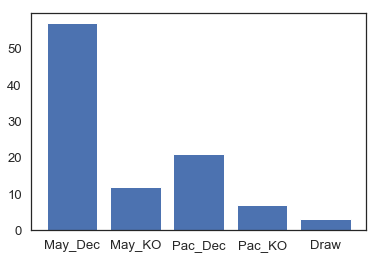

In [31]:
def step(sys):
    """This function takes in a system argument 
    containing punch probabilities and increments
    the state objects for each fighter"""
    #Mayweather
    if flip(sys.m_throw): #probability Mayweather throws a punch
        sys.init.m_thrown += 1 # increment Mayweather round "thrown" stats
        mayweather.thrown += 1 # increment cumulative stats
        if flip(sys.m_land): #probability the thrown punch lands on Pacquiao
            sys.init.m_landed += 1 # increment Mayweather "landed" stats for this round
            mayweather.landed += 1 # increment cumulative stats
            if flip(sys.m_kd): #probability landed punch causes a knockdown
                sys.init.m_kd += 1 # increment knockdown counter
                mayweather.kd += 1  # increment cumulative stats
                if flip(sys.m_ko):   # probability that knocked down opponent is knocked out
                    mayweather.ko += 1
                  #  ko("Mayweather")
                    return True
                
  
    #Pacquiao
    if flip(sys.p_throw): #probability Pacquiao throws a punch
        sys.init.p_thrown += 1 # increment Pacquiao "thrown" stats
        pacquiao.thrown += 1  # increment cumulative stats
        if flip(sys.p_land): #probability the thrown punch lands on Mayweather
            sys.init.p_landed += 1 # increment Pacquiao "landed" stats
            pacquiao.landed += 1  # increment cumulative stats
            if flip(sys.p_kd): #probability landed punch causes a knockdown
                sys.init.p_kd += 1 # increment knockdown counter
                pacquiao.kd += 1  # increment cumulative stats
                if flip(sys.p_ko):   # probability that knocked down opponent is knocked out
                    pacquiao.ko += 1
                   # ko("Pacquiao") 
                    return True
                
def sim_round(sys):
    """Takes in a system object that includes punch counters for the round.
    Passes the system argument through the step function in a loop.
    increments state object parameters based on loop results."""
    
    reset_round_stats() # clear punch stats of previous round
    for i in range(180): # run step function for each second in 3 minute round
        res = step(sys)
        if res == True:
              return res
              break
    if sys.init.m_kd > sys.init.p_kd: #Mayweather wins round via KD
        mayweather.score += 10
        pacquiao.score += 9 - sys.init.m_kd  #subtract a point for each KD
    elif sys.init.m_kd < sys.init.p_kd:  # Pacquiao wins round via KD
        mayweather.score += 9 - sys.init.p_kd
        pacquiao.score += 10
    elif sys.init.m_landed > sys.init.p_landed: # Mayweather wins round
        mayweather.score += 10
        pacquiao.score += 9 - sys.init.m_kd
    elif sys.init.p_landed > sys.init.m_landed:  # Pacquiao wins round
        mayweather.score += 9 - sys.init.p_kd
        pacquiao.score += 10
    else:
        mayweather.score += 10
        pacquiao.score += 10
                

def run_simulation(sys, n_rounds, n_runs):
    results = State(Mayweather_Decision = 0,
                    Mayweather_KO = 0,
                    Pacquiao_Decision = 0,
                    Pacquiao_KO = 0,
                    Draw = 0)
    May_margin, Pac_margin = [],[]    
    labels = ['May_Dec', 'May_KO', 'Pac_Dec', 'Pac_KO', 'Draw']
    for run in range(n_runs):
        sim_fight(sys, n_rounds)
        if mayweather.score > pacquiao.score:
            results.Mayweather_Decision += 1
            x= int(mayweather.score - pacquiao.score)
            May_margin.append(x)
        elif mayweather.score < pacquiao.score:
            results.Pacquiao_Decision += 1
            y= int(pacquiao.score - mayweather.score)
            Pac_margin.append(y)
        elif mayweather.ko == 1:
            results.Mayweather_KO += 1
        elif pacquiao.ko == 1:
            results.Pacquiao_KO += 1
        elif mayweather.score == pacquiao.score:
            results.Draw += 1
    plt.bar(labels, results)
    print("Mayweather average margin of victory in decisions:", np.mean(May_margin))
    print("Pacquiao average margin of victory in decisions:", np.mean(Pac_margin))
    return results

run_simulation(system, 12, 100)

Now that we have that built, it's time to base the system parameters on real punch stats.

Mayweather average margin of victory in decisions: 2.604651162790698
Pacquiao average margin of victory in decisions: 2.878787878787879


,values
Mayweather_Decision,43
Mayweather_KO,7
Pacquiao_Decision,33
Pacquiao_KO,13
Draw,4


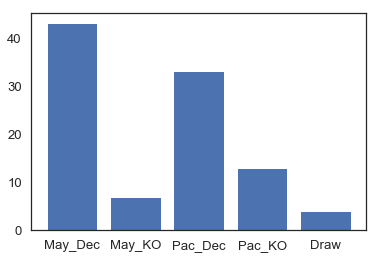

In [32]:
system = System(init = init, 
                m_throw = 0.21666,
                m_land = 0.483,
                m_kd = 0.008,  
                m_ko = 0.30,  
                p_throw = 0.31666,
                p_land = 0.327,
                p_kd = 0.01,   
                p_ko = 0.40)

run_simulation(system, 12, 100)

Mayweather average margin of victory in decisions: 2.8494897959183674
Pacquiao average margin of victory in decisions: 2.775252525252525


,values
Mayweather_Decision,392
Mayweather_KO,85
Pacquiao_Decision,396
Pacquiao_KO,113
Draw,14


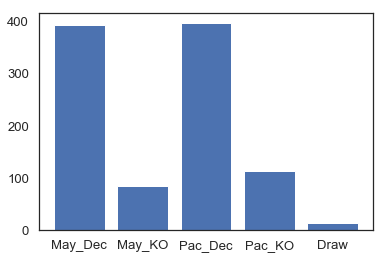

In [33]:
run_simulation(system, 12, 1000)

These are the results using each fighter's career punch statistics. The results show a very even match up. I'd like to take the average of each fighter's punch landed percentage and the other fighter's opponent's landed percentage to factor in the defense of the other fighter.  Mayweather lands at around 48% and his opponents only land around 16%, while Pacquiao lands at 33% and his opponents average 24.8%. Therefore since Pacquiao lands at 33%, but only 16% land on Mayweather, we'll take the average for the system parameter.

Mayweather average margin of victory in decisions: 3.022222222222222
Pacquiao average margin of victory in decisions: 2.8823529411764706


,values
Mayweather_Decision,45
Mayweather_KO,8
Pacquiao_Decision,34
Pacquiao_KO,13
Draw,0


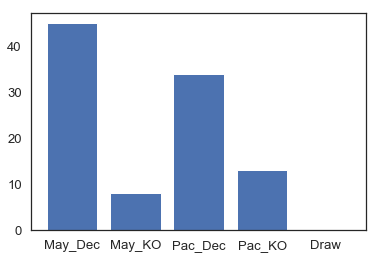

In [34]:
# There is a bug somewhere that run_simulation only runs properly with a system argument named 'system'
system = System(init = init,  
                m_throw = 0.21666,
                m_land = 0.364,
                m_kd = 0.008,  
                m_ko = 0.30,  
                p_throw = 0.31666,
                p_land = 0.245,
                p_kd = 0.01,   
                p_ko = 0.40)

run_simulation(system, 12, 100)

Mayweather average margin of victory in decisions: 2.9142156862745097
Pacquiao average margin of victory in decisions: 2.9129287598944593


,values
Mayweather_Decision,408
Mayweather_KO,72
Pacquiao_Decision,379
Pacquiao_KO,113
Draw,28


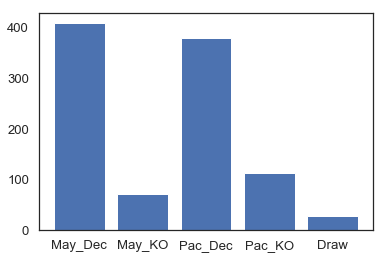

In [35]:
run_simulation(system, 12, 1000)

In this scenario, Pacquiao receives an outsized benefit due to Mayweather's lower punch output. It would be helpful to get an average punches thrown by mayweather opponents and average that with Pacquiao's. Mayweather opponents usually experience a drop in punch output when facing Mayweather, and it is important to build this into the model. I have averaged the numbers of a hadful of other Mayweather opponents and they averaged a 16% decrease in output again Mayweather, averaging 44 punches per round. This will be factored in the the parameters. There is no significant affect for Pacquaio's opponents' output. 

Mayweather average margin of victory in decisions: 3.1616161616161618
Pacquiao average margin of victory in decisions: 2.450980392156863


,values
Mayweather_Decision,495
Mayweather_KO,73
Pacquiao_Decision,306
Pacquiao_KO,109
Draw,17


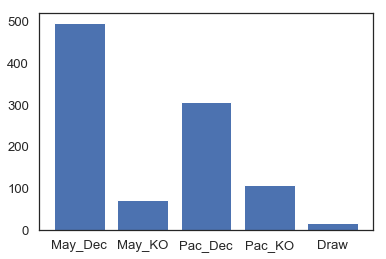

In [36]:
system = System(init = init,  
                m_throw = 0.21666,
                m_land = 0.46,
                m_kd = 0.007,  
                m_ko = 0.30,  
                p_throw = 0.285,
                p_land = 0.325,
                p_kd = 0.01,   
                p_ko = 0.40)

run_simulation(system, 12, 1000)

Mayweather average margin of victory in decisions: 3.1762295081967213
Pacquiao average margin of victory in decisions: 2.615873015873016


,values
Mayweather_Decision,488
Mayweather_KO,53
Pacquiao_Decision,315
Pacquiao_KO,117
Draw,27


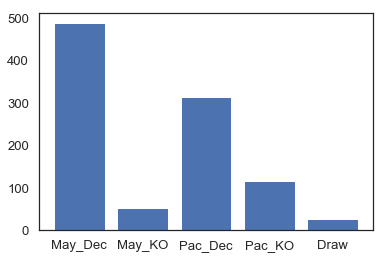

In [37]:
run_simulation(system, 12, 1000)

These parameters have Mayweather winning the fight the majority of the time, with Pacquiao winning a fair ammount of matches as well. Mayweather appears to win by wider margins on the scorecard on average than Pacquiao does. When the two did face off in 2015, Mayweather won the unanimous decision, with two judges scoring 116-112, and the third 118-110, that scenario appears to be one of the most common in our simulations, as we have mayweather by decision as the most common outcome, and the average margin of victory at over 3 points. On the night of the fight, Pacquiao had a much lower than usual punch output, which he attributed to a shoulder injury, but is also common for Mayweather opponents.